In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('matmul.csv')

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df0 = df[((df['dynamic'] == False) & (df['busy'] == 0))]

df

,dynamic,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,False,0,1,0.367637,0.003205,0.003215,1.000000,0.367637,114.717255
1,False,0,2,0.197543,0.001613,0.001611,0.998649,0.197276,122.432181
2,False,0,3,0.149297,0.001180,0.001132,0.959276,0.143217,126.472176
3,False,0,4,0.115595,0.000874,0.000857,0.980784,0.113374,132.236836
4,False,0,5,0.102406,0.000736,0.000701,0.953006,0.097594,139.154079
...,...,...,...,...,...,...,...,...,...
571,True,32,28,0.423896,0.002206,0.000182,0.082623,0.035023,192.120408
572,True,32,29,0.417421,0.002196,0.000185,0.084450,0.035251,190.058208
573,True,32,30,0.506502,0.002595,0.000225,0.086765,0.043947,195.201293
574,True,32,31,0.548392,0.002774,0.000260,0.093829,0.051455,197.691577


In [13]:
df_speedup = df.copy()

for col in df_speedup.columns[2:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup0 = df_speedup.loc[(df['dynamic'] == False) & (df_speedup['busy'] == 0)]

df_speedup

,dynamic,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,False,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,False,0,0.500000,1.861045,1.986204,1.995407,1.001353,1.863563,0.936986
2,False,0,0.333333,2.462458,2.714783,2.839305,1.042453,2.566996,0.907055
3,False,0,0.250000,3.180390,3.666098,3.750173,1.019592,3.242701,0.867514
4,False,0,0.200000,3.589982,4.354712,4.584422,1.049312,3.767010,0.824390
...,...,...,...,...,...,...,...,...,...
571,True,32,0.035714,0.867280,1.452459,17.637041,12.103229,10.496883,0.597111
572,True,32,0.034483,0.880733,1.459158,17.334914,11.841281,10.429013,0.603590
573,True,32,0.033333,0.725834,1.235069,14.281298,11.525396,8.365524,0.587687
574,True,32,0.032258,0.670390,1.155279,12.352943,10.657690,7.144805,0.580284


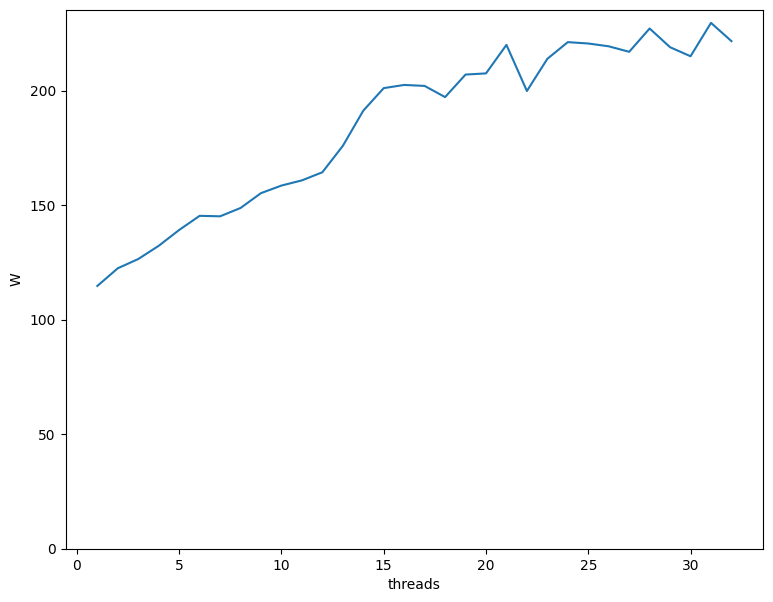

In [14]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df0, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

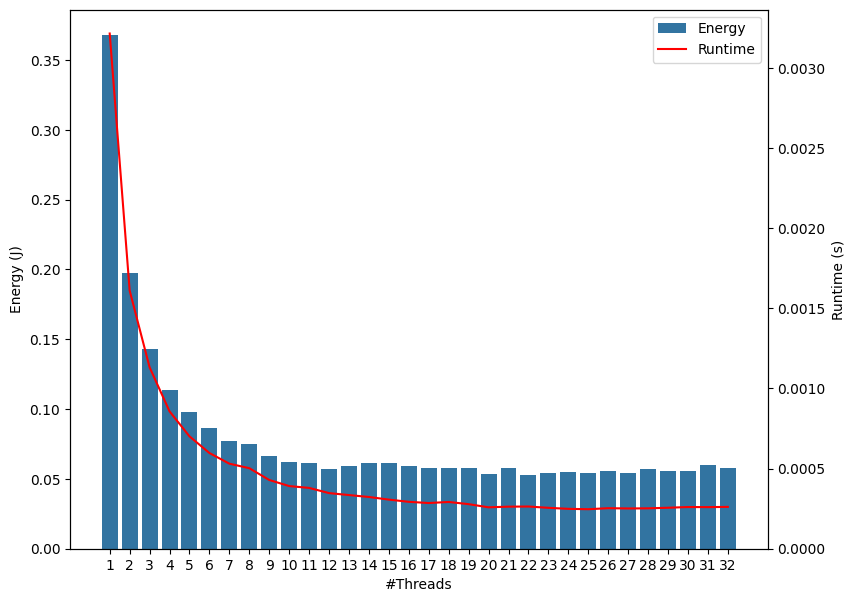

In [15]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df0, x=df0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy (J)')
ax2.set_ylabel('Runtime (s)')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

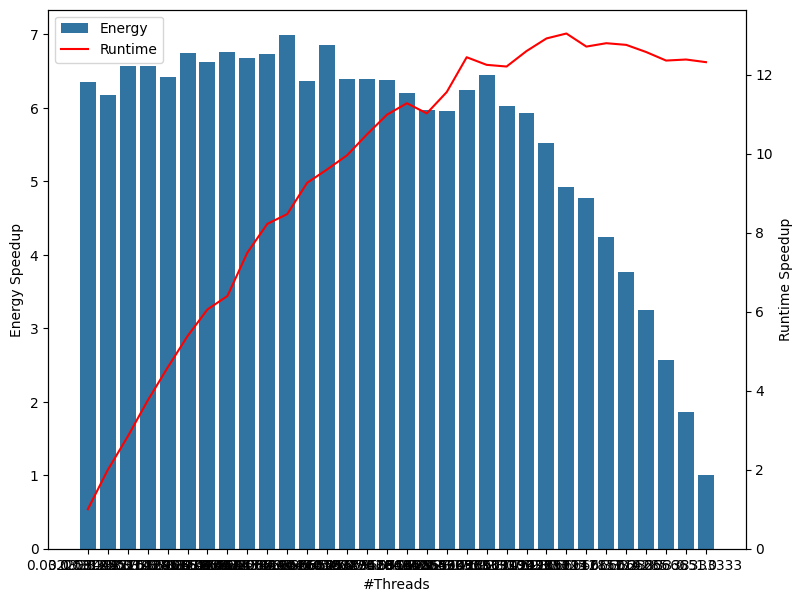

In [32]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df_speedup0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df_speedup0, x=df_speedup0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy Speedup')
ax2.set_ylabel('Runtime Speedup')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

# With busy threads

In [17]:
for (busy, df_busy) in df.groupby('busy'):
    best = df_busy[df_busy['energy'] == df_busy['energy'].min()].iloc[0]
    print(busy, '\t', int(best['threads']), '\t', best['energy'])

0 	 12 	 0.06460475
4 	 17 	 0.06044585
8 	 16 	 0.06369379
12 	 14 	 0.06651506
16 	 16 	 0.0682584
20 	 13 	 0.08092218
24 	 8 	 0.09800479
28 	 4 	 0.16858539
32 	 8 	 0.25886293


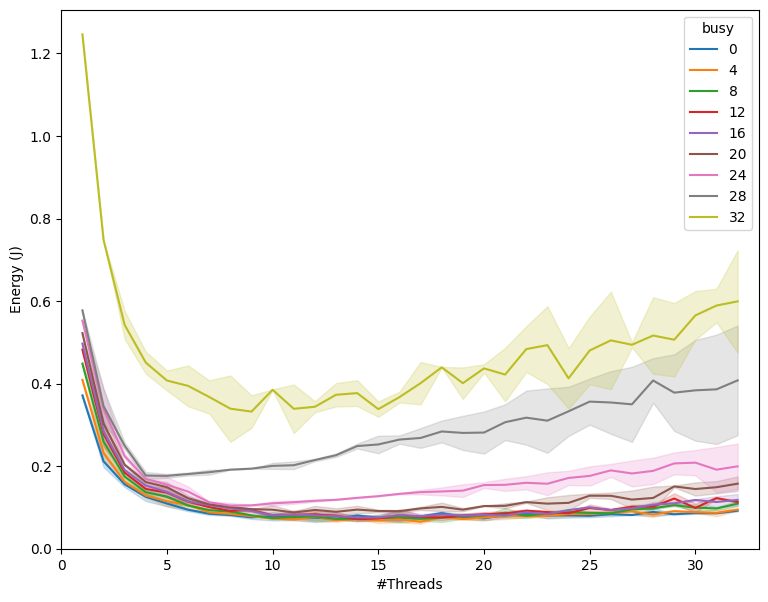

In [18]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='energy', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()

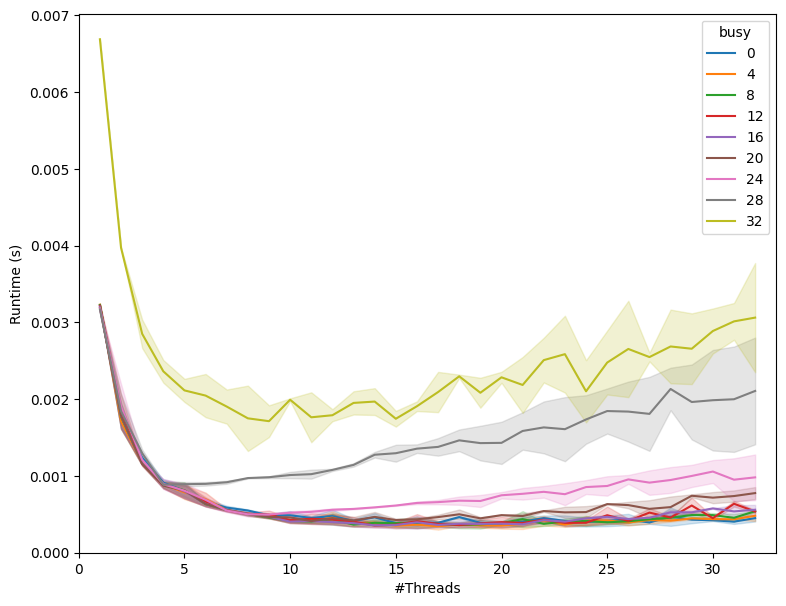

In [19]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='runtime', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()